# Isotropic smoothing of image via Heat equation

## import library

In [27]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors
from skimage import color
from skimage import io

## load input image
- filename for the input image is 'barbara_color.jpeg'

In [28]:
 
I0 = io.imread('barbara_color.jpeg')

## check the size of the input image

In [29]:

num_row     = I0.shape[0]
num_column  = I0.shape[1]
num_channel = I0.shape[2]


print('number of rows of I0 = ', num_row)
print('number of columns of I0 = ', num_column)
print('number of channels of I0 = ', num_channel)

number of rows of I0 =  512
number of columns of I0 =  512
number of channels of I0 =  3


## convert the color image into a grey image

In [30]:

I = color.rgb2gray(I0)

num_row     = I.shape[0]
num_column  = I.shape[1]


print('number of rows of I = ', num_row)
print('number of columns of I = ', num_column)

number of rows of I =  512
number of columns of I =  512


## normalize the converted image
- normalize the converted grey scale image so that its maximum value is 1 and its minimum value is 0

In [31]:

I = (I-I.min())/(I.max()-I.min())


print('maximum value of I = ', np.max(I))
print('minimum value of I = ', np.min(I))

maximum value of I =  1.0
minimum value of I =  0.0


## define a function to compute the derivative of input matrix in x(row)-direction

- forward difference : $ I[x+1, y] - I[x, y] $ 

In [32]:
def compute_derivative_x_forward(I):
    
    D = np.zeros(I.shape)
    D = np.roll(I,-1,axis=0)
    D[-1,:] = D[-2,:]
    D = D-I

    return D

- backward difference : $ I[x, y] - I[x-1, y] $ 

In [33]:
def compute_derivative_x_backward(I):
    
    D = np.zeros(I.shape)
    

    D = np.roll(I,1,axis=0)
    D[0,:] = D[1,:]
    D = I-D
    
    
    return D

## define a function to compute the derivative of input matrix in y(column)-direction

- forward difference : $ I[x, y+1] - I[x, y] $ 

In [34]:
def compute_derivative_y_forward(I):
    
    D = np.zeros(I.shape)
    D = np.roll(I,-1,axis=1)
    D[:,-1] = D[:,-2]
    D = D-I

    return D

- backward difference : $ I[x, y] - I[x, y-1] $ 

In [35]:
def compute_derivative_y_backward(I):
    
    D = np.zeros(I.shape)
    D = np.roll(I,1,axis=1)
    D[:,0] = D[:,1]
    D = I-D
    
    return D

## define a function to compute the laplacian of input matrix
- $\Delta I = \nabla^2 I = \frac{\partial^2 I}{\partial x^2} + \frac{\partial^2 I}{\partial y^2}$
- $\Delta I = I[x+1, y] + I[x-1, y] + I[x, y+1] + I[x, y-1] - 4 * I[x, y]$
- $\Delta I$ = derivative_x_forward - derivative_x_backward + derivative_y_forward - derivative_y_backward

In [36]:
def compute_laplace(I):
    
    laplace = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    x_forward = compute_derivative_x_forward(I)
    x_backward = compute_derivative_x_backward(I)
    y_forward = compute_derivative_y_forward(I)
    y_backward = compute_derivative_y_backward(I)

    laplace = (x_forward - x_backward) + (y_forward - y_backward)
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return laplace

## define a function to compute the heat equation of data $I$ with a time step
- $I = I + \delta t * \Delta I$

In [37]:
def heat_equation(I, time_step):

    I_laplace = compute_laplace(I)
    I_update = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    I_update = I + time_step * I_laplace
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return I_update

## run the heat equation over iterations

In [38]:
def run_heat_equation(I, time_step, number_iteration):

    I_update = np.zeros(I.shape)

    for t in range(number_iteration):
        # ++++++++++++++++++++++++++++++++++++++++++++++++++
        # complete the blanks
        #
        I = heat_equation(I, time_step)
        I_update = I
    
        #
        # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return I_update

___

___

## functions for presenting the results

___

___

In [39]:
def function_result_01():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I0)
    plt.show()

In [40]:
def function_result_02():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I, cmap='gray', vmin=0, vmax=1, interpolation='none')
    plt.show()

In [41]:
def function_result_03():

    L = compute_laplace(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(L, cmap='gray')
    plt.show()

In [42]:
def function_result_04():

    time_step   = 0.25
    I_update    = heat_equation(I, time_step)
    
    plt.figure(figsize=(8,6))
    plt.imshow(I_update, vmin=0, vmax=1, cmap='gray')
    plt.show()

In [43]:
def function_result_05():

    time_step           = 0.25
    number_iteration    = 128

    I_update = run_heat_equation(I, time_step, number_iteration)
    
    plt.figure(figsize=(8,6))
    plt.imshow(I_update, vmin=0, vmax=1, cmap='gray')
    plt.show()

In [44]:
def function_result_06():

    time_step           = 0.25
    number_iteration    = 512

    I_update = run_heat_equation(I, time_step, number_iteration)
    
    plt.figure(figsize=(8,6))
    plt.imshow(I_update, vmin=0, vmax=1, cmap='gray')
    plt.show()

In [45]:
def function_result_07():

    L = compute_laplace(I)

    value1 = L[0, 0]    
    value2 = L[-1, -1]    
    value3 = L[100, 100]    
    value4 = L[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)

In [46]:
def function_result_08():

    time_step   = 0.25
    I_update    = heat_equation(I, time_step)

    value1 = I_update[0, 0]    
    value2 = I_update[-1, -1]    
    value3 = I_update[100, 100]    
    value4 = I_update[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)

In [47]:
def function_result_09():

    time_step           = 0.25
    number_iteration    = 128

    I_update = run_heat_equation(I, time_step, number_iteration)

    value1 = I_update[0, 0]    
    value2 = I_update[-1, -1]    
    value3 = I_update[100, 100]    
    value4 = I_update[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)

In [48]:
def function_result_10():

    time_step           = 0.25
    number_iteration    = 512

    I_update = run_heat_equation(I, time_step, number_iteration)

    value1 = I_update[0, 0]    
    value2 = I_update[-1, -1]    
    value3 = I_update[100, 100]    
    value4 = I_update[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)

___

___

# results

___

___

**************************************************
## [RESULT 01]
**************************************************


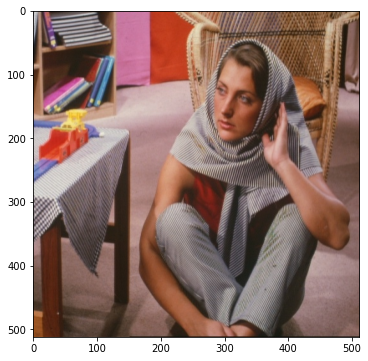

**************************************************
## [RESULT 02]
**************************************************


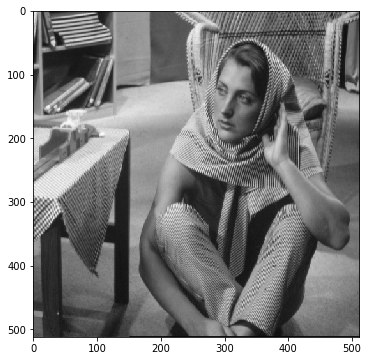

**************************************************
## [RESULT 03]
**************************************************


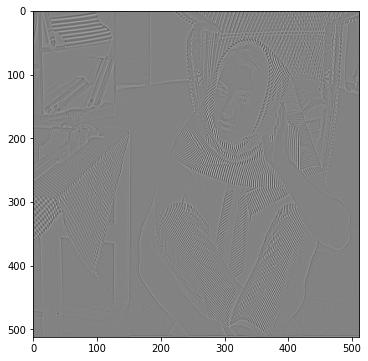

**************************************************
## [RESULT 04]
**************************************************


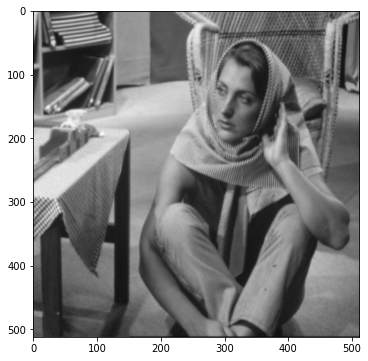

**************************************************
## [RESULT 05]
**************************************************


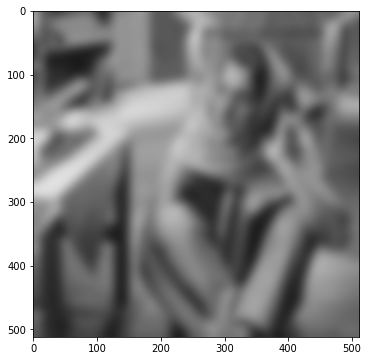

**************************************************
## [RESULT 06]
**************************************************


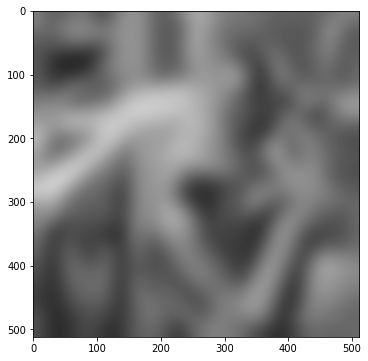

**************************************************
## [RESULT 07]
**************************************************
value1 =  0.38873832902073646
value2 =  0.3503440089528004
value3 =  -0.12053874833921746
value4 =  -0.05899756869858053
**************************************************
## [RESULT 08]
**************************************************
value1 =  0.11620040458063048
value2 =  0.157486029006043
value3 =  0.5094184630641501
value4 =  0.5927687759993218
**************************************************
## [RESULT 09]
**************************************************
value1 =  0.5888968793394928
value2 =  0.4001111466554692
value3 =  0.3666490919303763
value4 =  0.6016268928857371
**************************************************
## [RESULT 10]
**************************************************
value1 =  0.4900069282490228
value2 =  0.40789065395948143
value3 =  0.3499314993278954
value4 =  0.6313890906075725


In [49]:
number_result = 10

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)